In [1]:
import psycopg2
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import json

database = 'fomc'
conn = psycopg2.connect("dbname=" + database + " user=abarciauskas")
cur = conn.cursor()

cur.execute("SELECT Doc1Id,Doc2Id,CosineSimilarity FROM alignments ORDER BY random() limit 10000")
cosine_sims = cur.fetchall()

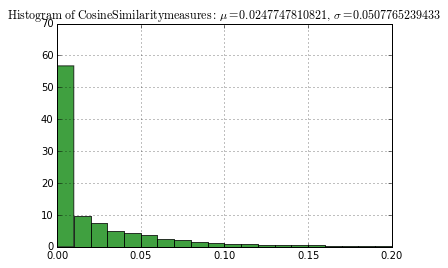

In [2]:
%matplotlib inline

cos_list = [float(cosine[2]) for cosine in cosine_sims]

cos_list[0:10]
# the histogram of the data
n, bins, patches = plt.hist(cos_list, 100, normed=1, facecolor='green', alpha=0.75)
mu = np.mean(cos_list)
sigma = np.std(cos_list)
plt.title(r'$\mathrm{Histogram\ of\ Cosine Similarity measures:}\ \mu=' + str(mu) + ',\ \sigma=' + str(sigma) + '$')
# Note: there is a value lower, ths has cut some extremes
plt.axis([0, 0.2, 0, 70])
plt.grid(True)

plt.show()

In [3]:
np.percentile(cos_list, np.arange(50,100,10))

array([ 0.        ,  0.01304979,  0.02433026,  0.0428158 ,  0.07223504])

In [4]:
very_similar_pairs = filter(lambda x: x[2] > 0.13, cosine_sims)

In [5]:
float(len(very_similar_pairs))/len(cosine_sims)

0.0335

In [6]:
import random
rand_pair = random.choice(very_similar_pairs)
rand_pair

(1157, 1839, Decimal('0.13287551107869547'))

In [7]:
sql = "SELECT Original FROM processed_documents WHERE Id = " + str(rand_pair[0]) + " OR Id = " + str(rand_pair[1]) + ";"
cur.execute(sql)
docs = cur.fetchall()
print docs[0]
print docs[1]

('Household debt growth likely moderated amid hints of a downshift in mortgage borrowing from its robust third-quarter pace and an outright decline in consumer credit, which owed in part to increased charge-offs from Octobers spike in bankruptcy filings.',)
('The increase likely owed in part to the exercise of stock options and cash bonuses; other data that did not include such forms of compensation pointed to more moderate increases.',)
